In [1]:
#hamza azed - project clustering
#load libraries

%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [9]:
#inserting dataset

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c1ee558308e0477d81ac4cc3d2af77ac = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='KXv31uhKaQiiDZwOUbHxCc7kFitThD23h597khbeuEDP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_c1ee558308e0477d81ac4cc3d2af77ac.get_object(Bucket='hamzaazedhc-donotdelete-pr-8i1ok91iyzqdsm',Key='USArrests.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

#exploratory data analysis

df = df.rename(columns={'Unnamed: 0': 'States'})
print(df.shape)
df.head()


(50, 5)


,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


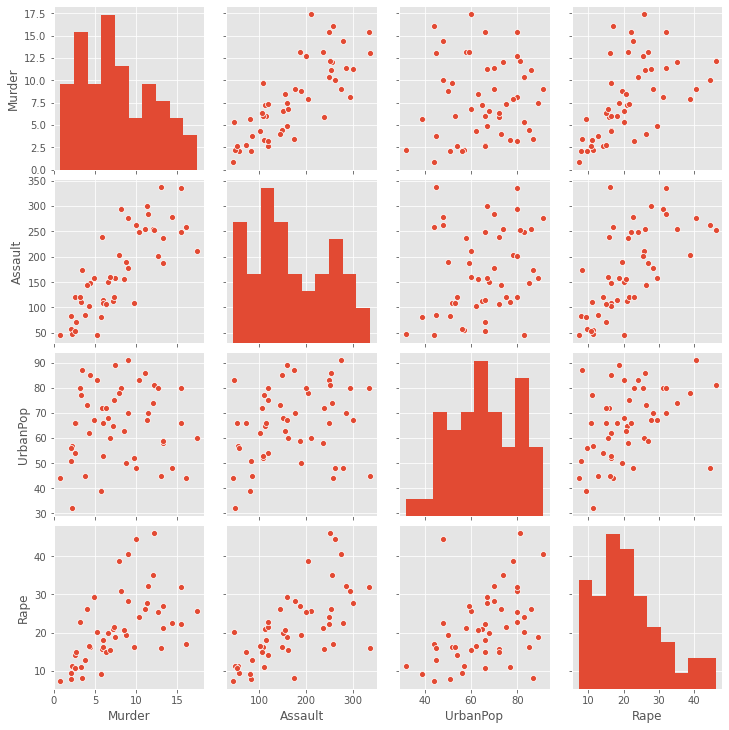

In [10]:
sns.pairplot(df)

In [20]:
#standardization

ss = StandardScaler()
X_scaled = ss.fit_transform(df.iloc[:,1:])
print("Preprocessing the data prior to clustering.")

Preprocessing the data prior to clustering.


In [21]:
#principle component analysis

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_scaled)

In [22]:
print ("The 1st principal component is:", pca.components_[0])
print ("The 2nd principal component is:", pca.components_[1])

The 1st principal component is: [0.53589947 0.58318363 0.27819087 0.54343209]
The 2nd principal component is: [ 0.41818087  0.1879856  -0.87280619 -0.16731864]


In [23]:
print ("The 1st principal component explains", pca.explained_variance_ratio_[0], "of the variance.")
print ("The 2nd principal component explains", pca.explained_variance_ratio_[1], "of the variance.")
print ("Together they explain", pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1], "of the variance.")
print()
print("Note: 86.75% of the variance can be explained as it contains a lot of the information in our dataset!")

The 1st principal component explains 0.6200603947873736 of the variance.
The 2nd principal component explains 0.2474412881349602 of the variance.
Together they explain 0.8675016829223339 of the variance.

Note: 86.75% of the variance can be explained as it contains a lot of the information in our dataset!


In [25]:
# hierarchical clustering

Z = linkage(X_scaled, 'ward')
c, cdoph_dists = cophenet(Z, pdist(X_scaled))
print("cophenetic correlation coefficient: ",c)
print()
print("cophenetic correlation matrix: ", cdoph_dists)

cophenetic correlation coefficient:  0.6975265632370388

cophenetic correlation matrix:  [ 6.52747083  6.52747083 13.6534666  ...  3.02367873  7.26116776
  7.26116776]


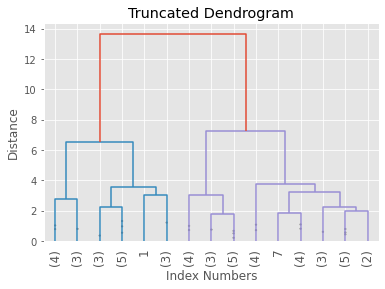

In [27]:
#dendogram

plt.title('Truncated Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=15,  
    show_leaf_counts=True,  
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.show()

{1, 2, 3, 4, 5, 6, 7, 8, 9}


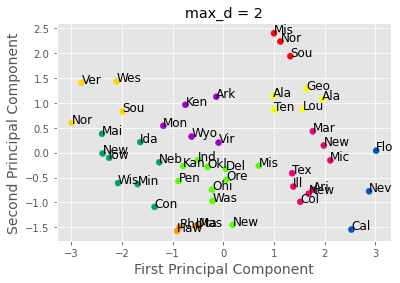

{1, 2, 3, 4}


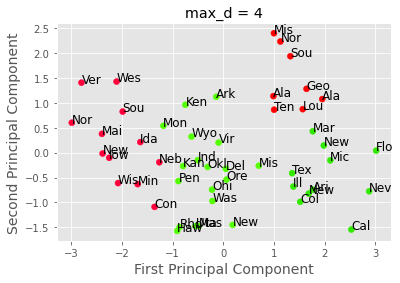

{1, 2, 3, 4}


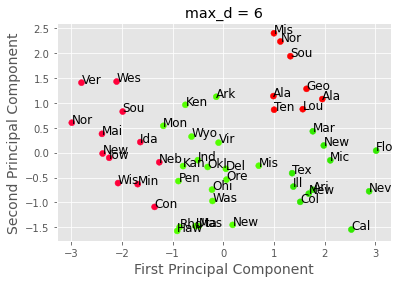

{1, 2}


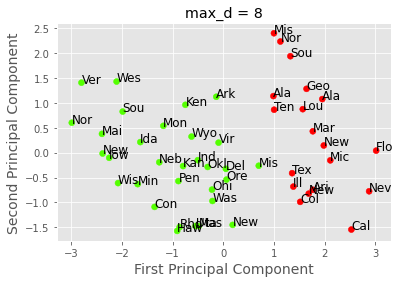

{1, 2}


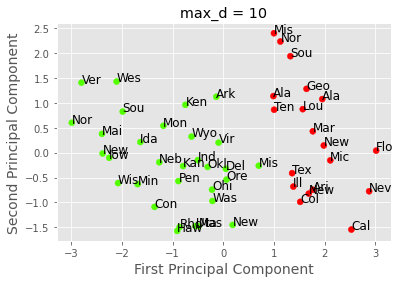

In [31]:
#visulizing clusters of the states in dataset

for i in range(2,12,2):
    max_d = i
    clusters = fcluster(Z, max_d, criterion='distance')
    print(set(clusters))
    plt.scatter(df_pca[:,0], df_pca[:,1], c=clusters, cmap='prism')
    plt.title("max_d = "+str(i))
    for i, x_i in enumerate(df['States']):
        plt.annotate(x_i[:3], (df_pca[i,0], df_pca[i,1]), fontsize=12)
    plt.xlabel('First Principal Component',fontsize=14)
    plt.ylabel('Second Principal Component',fontsize=14)
    plt.show()